In [46]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tfç
import tensorflow_decision_forests as tfdf
import pickle

In [12]:
data = pd.read_csv('./data/clean/diamondsdlfe2xso.csv')[data.columns[1:]]

In [33]:
data


,price,carat,depth,table,x,y,z,cut,color,clarity,city,x/y,td,ad
0,4268,1.21,62.400000,58.0,6.83,6.79,4.25,4.0,1.0,4.0,1.069918,1.005891,0.929487,0.006139
1,505,0.32,63.000000,57.0,4.35,4.38,2.75,3.0,3.0,4.0,1.056107,0.993151,0.904762,0.006107
2,2686,0.71,65.500000,55.0,5.62,5.53,3.65,1.0,4.0,5.0,1.038843,1.016275,0.839695,0.006259
3,738,0.41,63.800000,56.0,4.68,4.72,3.00,2.0,7.0,3.0,1.056107,0.991525,0.877743,0.006187
4,4882,1.02,60.500000,59.0,6.55,6.51,3.95,5.0,4.0,3.0,1.069918,1.006144,0.975207,0.006056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,62.700000,57.0,7.10,7.04,4.43,5.0,4.0,5.0,1.035822,1.008523,0.909091,0.006052
40451,12615,2.02,57.457665,60.0,8.31,8.25,4.73,2.0,5.0,2.0,1.036038,1.007273,1.044247,0.006229
40452,5457,1.01,62.700000,56.0,6.37,6.42,4.01,5.0,3.0,3.0,1.056107,0.992212,0.893142,0.006159
40453,456,0.33,61.900000,54.3,4.45,4.47,2.76,5.0,1.0,5.0,1.056107,0.995526,0.877221,0.006011


In [18]:
X = data
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [35]:
X_train

,price,carat,depth,table,x,y,z,cut,color,clarity,city,x/y,td,ad
32121,1577,0.52,63.2,58.0,5.12,5.10,3.23,3.0,4.0,4.0,1.031075,1.003922,0.917722,0.006165
9831,10685,1.59,59.9,59.0,7.60,7.52,4.53,3.0,7.0,2.0,1.038843,1.010638,0.984975,0.006141
33128,1885,0.66,61.7,55.0,5.64,5.60,3.47,5.0,4.0,3.0,1.069918,1.007143,0.891410,0.006022
6199,637,0.38,61.2,55.1,4.69,4.73,2.88,5.0,3.0,3.0,1.033233,0.991543,0.900327,0.005948
19661,2874,0.70,61.8,58.0,5.67,5.63,3.49,4.0,4.0,6.0,1.000000,1.007105,0.938511,0.006283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2739,0.71,62.0,57.0,5.71,5.75,3.55,5.0,3.0,7.0,1.035822,0.993043,0.919355,0.006092
11284,984,0.35,59.5,58.0,4.62,4.59,2.74,4.0,6.0,4.0,1.056107,1.006536,0.974790,0.006024
38158,530,0.23,59.4,59.0,4.03,4.08,2.41,3.0,6.0,6.0,1.056107,0.987745,0.993266,0.005804
860,4273,1.00,58.0,58.0,6.56,6.62,3.82,2.0,2.0,3.0,1.056107,0.990937,1.000000,0.006028


In [19]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, label="price", task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, label="price", task = tfdf.keras.Task.REGRESSION)

2024-02-12 14:34:17.106312: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 14:34:17.129480: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 14:34:17.129510: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 14:34:17.131324: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 14:34:17.131352: I external/local_xla/xla/stream_executor

In [81]:
rf = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION,num_trees= 300,max_depth=6)
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmpbow8z768 as temporary training directory


[WARNING 24-02-12 16:24:20.0619 CET gradient_boosted_trees.cc:1886] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-02-12 16:24:20.0619 CET gradient_boosted_trees.cc:1897] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-02-12 16:24:20.0619 CET gradient_boosted_trees.cc:1911] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [76]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.233089. Found 32364 examples.
Training model...
Model trained in 0:00:02.154790
Compiling model...
Model compiled.


[INFO 24-02-12 16:23:55.2142 CET kernel.cc:1233] Loading model from path /tmp/tmp3dsc_ydy/model/ with prefix bfb9642c99114135
[INFO 24-02-12 16:23:55.2177 CET quick_scorer_extended.cc:903] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-02-12 16:23:55.2180 CET abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-02-12 16:23:55.2180 CET kernel.cc:1061] Use fast generic engine


In [77]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=6)

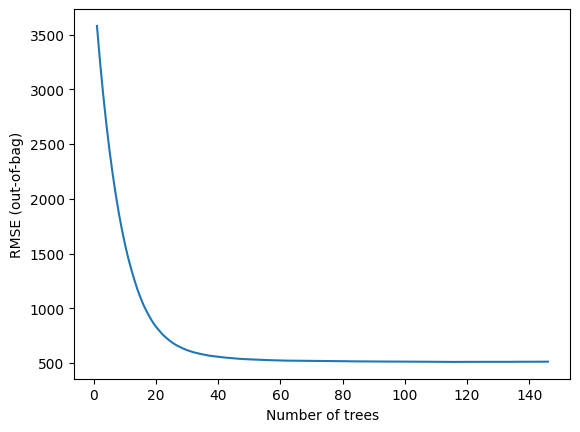

In [78]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [79]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=None, accuracy=None, loss=510.3607482910156, rmse=510.3607482910156, ndcg=None, aucs=None, auuc=None, qini=None)

In [30]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

9/9 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - mse: 283127.9062
loss: 0.0000
mse: 283127.9062


In [31]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


In [34]:
inspector.variable_importances()["INV_MEAN_MIN_DEPTH"]

[("clarity" (1; #4), 0.2617884031230105),
 ("y" (1; #12), 0.2497286320873954),
 ("color" (1; #5), 0.2451310340510997),
 ("carat" (1; #2), 0.24102680515939823),
 ("z" (1; #13), 0.2186295320123484),
 ("x" (1; #10), 0.20137253503169164),
 ("x/y" (1; #11), 0.19672241647913952),
 ("ad" (1; #1), 0.19195095093691872),
 ("cut" (1; #6), 0.18744858439730896),
 ("depth" (1; #7), 0.18609420526642284),
 ("td" (1; #9), 0.1814232560682041),
 ("table" (1; #8), 0.1793747025032172),
 ("city" (1; #3), 0.17201597746245154)]

In [39]:
test_file_path = './data/clean/testdl123fexydatdso3x2.csv'
test_data = pd.read_csv(test_file_path)

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'id': list(range(len(test_data))),
                       'price': preds.squeeze()})

output.head()

14/14 [==============================] - 0s 5ms/step


,id,price
0,0,2853.439209
1,1,5810.128418
2,2,9582.651367
3,3,4083.331299
4,4,1648.738281


In [45]:
output.to_csv('./submissions/tfdl123fexydatdso3x2.csv', index=False)

In [43]:
output

,id,price
0,0,2853.439209
1,1,5810.128418
2,2,9582.651367
3,3,4083.331299
4,4,1648.738281
...,...,...
13480,13480,1697.279663
13481,13481,2438.009033
13482,13482,3145.374512
13483,13483,2112.710449


In [47]:
pickle.dump(rf, open('./models/TFGBdl123xytdadso3x2.sav', 'wb'))